In [1]:
import sys
sys.path.append('../')
sys.dont_write_bytecode = True
import os
import numpy as np
import scipy
import scipy.ndimage
from matplotlib.pyplot import *
%matplotlib inline
import numba
sys.path.append('/Users/Michael_Saha/Repositories/')
sys.path.append('./../../../')
from fire_sim import *

In [2]:
import gdal
c = '/Volumes/SAHA/DATA/FotF/classed/classed1.tif'
C = gdal.Open(c).ReadAsArray()

In [3]:
C.shape

(10596, 12231)

In [4]:
(np.array(C.shape)/10).astype(int)

array([1059, 1223])

In [5]:
c = scipy.misc.imresize(C, (np.array(C.shape)/10).astype(int) )

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


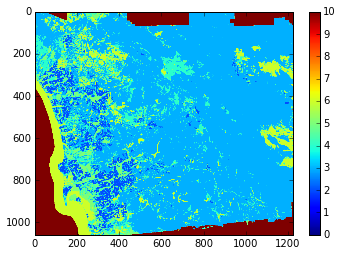

In [98]:
imshow(c)
clim(0,10)
colorbar()

In [100]:
from osgeo import ogr
perims_file = '/Volumes/SAHA/DATA/FotF/perims_SANDAG/fire_burn_history_proj.shp'

In [111]:
shp_driver = ogr.GetDriverByName('ESRI Shapefile')
x = shp_driver.Open(perims_file)
print(x[0])
s = x[0]
s.GetExtent()
f = s.GetNextFeature()

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x10e5498d0> >


In [144]:
g = f.geometry()
print(g)

POLYGON ((531648.66143939900212 3697142.354442967567593,531642.486711318837479 3697125.980033842846751,531625.964305098052137 3697126.913174869958311,531615.972088284906931 3697130.062518151011318,531609.893254698021337 3697141.978818174917251,531609.525021595531143 3697155.733237658627331,531602.862301730085164 3697162.009542476385832,531605.381582443020307 3697177.692490824498236,531604.532688787090592 3697189.037148631643504,531605.232519954093732 3697198.311266862321645,531607.755423142807558 3697201.464037837460637,531613.908108928473666 3697204.500694586429745,531626.01994 3697204.517139558680356,531628.465505838044919 3697205.24721884354949,531651.917663457687013 3697219.047441979404539,531649.54584637703374 3697233.270197941921651,531639.343710576067679 3697242.489131436217576,531638.688219955191016 3697259.89048468740657,531647.118836043518968 3697258.407997757662088,531667.797471964615397 3697235.919409256894141,531668.036781663657166 3697218.127198218367994,531663.8010547509

In [188]:
c = g.Centroid()

(0.0, 0.0, 0.0)

In [160]:
c = g.GetCurveGeometry()
c.GetPoint()

(6.95321986655713e-310, 2.1221942334e-314, 2.240834693e-314)

In [128]:
[i for i in g.]

[<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x120bcd5a0> >]

In [110]:
f.GetField(6)

SyntaxError: invalid syntax (<ipython-input-110-62f926234309>, line 2)

In [92]:
f = s.GetFeature(5)
f.items()

{'ACRES_CALC': 1.98708181,
 'AGENCY_MAT': 'CDF',
 'ALARM_DATE': 20120813,
 'CAUSE': 'Lightning',
 'CAUSECODE': 1.0,
 'COMMENTS': 'VALLECITO LIGHTNING COMPLEX',
 'CONT_DATE': 20120820,
 'COST': 0,
 'C_METHOD': 8,
 'DAY_': 13.0,
 'FIRE_NAME': 'SHOOTS',
 'FIRE_NUM': '008747',
 'GIS_ACRES': 1.98725915,
 'INC_NUM': '008747',
 'MONTH_': 8.0,
 'OBJECTIVE': 1,
 'PERIMETER': 1179.23509966,
 'REPORT_AC': 22829.0,
 'SHAPE_AREA': 86556.9376053,
 'SHAPE_LEN': 1179.23509968,
 'SHAPE_LENG': 0.0,
 'UNIQUE_ID': '2012CAMVU008747',
 'UNIT_ID': 'MVU',
 'YEAR_': '2012'}

In [97]:
l = x.GetLayer()
l.GetNextFeature()